In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

---

# **Milestone 1 Phase 2**

## 1 - Perkenalan

```
Nama : Khalisul Akbar

Batch : FTDS-Batch 10
```


### Description



#### Objective :

```
Adapun objective yang ingin dicapai pada project ini adalah :
1. Exploratory Data Analysis untuk memperoleh pemahaman dataset yang baik.
2. Preprocessing data yang baik untuk mendapatkan model yang baik.
3. Features Engineering untuk mendapatkan Feature yang memiliki korelasi yang baik dengan Target.
4. Mampu mengimplementasikan ANN.


```

#### Problem Statement :

```
Beberapa tahapan-tahapan yang harus dilalui pada project ini adalah :
1. Melakukan visualisasi dataset untuk mengetahui gambaran umum dari dataset yang digunakan.
2. Pengecekan dan menghandle outliers dan missing value.
3. Memilih Feature yang akan digunakan untuk membuat model dengan menghitung korelasi antara Feature dengan label/target.
4. Memingmplementasikan ANN dan mengoptimalisasikan model.
5. Melakukan pengetesan model yang telah dibuat dengan data inference.
```

---

## **Working Area**


## 2 - Import Libraries

In [2]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

## 3 - Data Loading

In [3]:
# Load the dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Duplicate the dataset

df_ori = df.copy()

In [5]:
# Check Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the info above we can see that the dataset have 7043 rows with 21 columns. At a glance it seems that there are no missing values shown.

In [6]:
# Check Dataset's statistical info

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check Dataset's statistical info

df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


From the table above, there are two columns we have to handle first, which are :
1. customersID which has number and string mixed in its values. However, since customersID's unique has 7043 from 7043 count, it means that we ccan drop this column since it is not essential.
2. TotalCharges which has numerical values but labeled as object. moreover it has 6531 unique value on 7043 count an, so we will check it later.

In [8]:
# Drop column

df.drop('customerID', axis=1, inplace=True)

In [9]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

there are 11 ' ' values, so it need to be change to np.nan first.

In [10]:
# Treat unknown as missing value

df = df.replace(' ', np.nan)



so then we can change df['TotalCharges'] to float

In [11]:
# change data type from object to float

df['TotalCharges'] = df['TotalCharges'].astype(float)

So, we can treat those ' ' values as missing values


In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 4 - Exploratory Data Analysis (EDA)

### 1. Taking a look at the numerical and categorical columns

In [13]:
# Get Numerical Columns and Categorical Columns (original)

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Numerical columns

print('Numerical Columns : \n' , df[num_columns].nunique())

Numerical Columns : 
 SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6530
dtype: int64


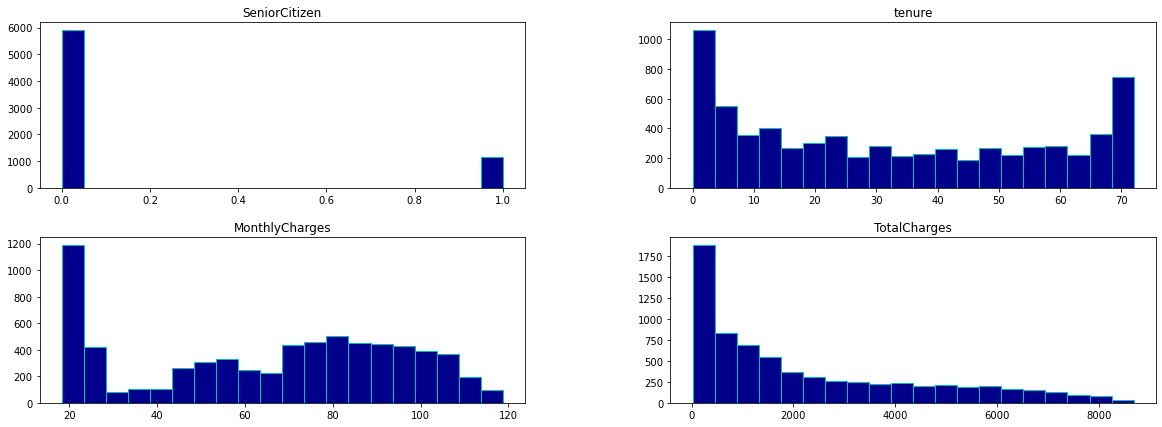

In [15]:
# Numerical column's value histogram

df.hist(bins=20, figsize=(20,7), grid=False, color='darkblue', edgecolor='c')
plt.show()



From histogram plot above we can conclude that :

*   From SeniorCitizen graph (Indicates if the customer is 65 or older) : older customers [1] is significantly lower than younger customers [0] 

*   Tenure Graph (indicate how long in month the customers has been with the Telco :  Customers tenure varies between 0 month to 72 months with 3 months-old customers has the highest number followed by 70-72 months-old customers as the second highest.

* Taking a look at the MonthlyCharges graph (the customer's Monthly charge) : it seems that most of the customers are getting charge at the cheapest rate at only 20 dollars monthly. However, there are also customer that getting charge at a rate of 40, 60 to 120 dollars.

* TotalCharge (indicate the total amount of charge the customers have to pay) : from the graph we can see that the customer charge rate varies from the lowest 18 dollars to the highses 8000++ dollars. However, most of the customers total charge is at around below 2000 dollars.




In [16]:
# Categorical columns

print('Categorical Columns : ')
for i in cat_columns:
    cat = df_ori[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')



Categorical Columns : 
gender (2): ['Female' 'Male']
----------------------------------------
Partner (2): ['Yes' 'No']
----------------------------------------
Dependents (2): ['No' 'Yes']
----------------------------------------
PhoneService (2): ['No' 'Yes']
----------------------------------------
MultipleLines (3): ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService (3): ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity (3): ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup (3): ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection (3): ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport (3): ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV (3): ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies (3): ['No' 'Yes' 'No inter

### 2. Plot the target column to see its value proportion 

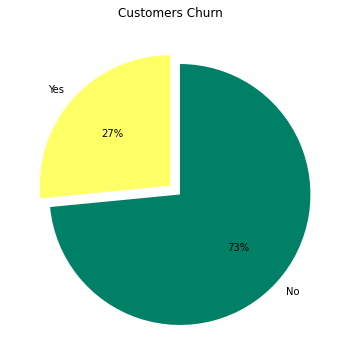

In [17]:
# Plot the target

explode = (0, 0.1)
plt.figure(figsize=(20,6))
df.groupby("Churn")['Churn'].count().sort_values().plot(kind='pie', autopct='%.0f%%' , ylabel='' , startangle=90, cmap= 'summer_r', explode=explode).set_title('Customers Churn')
plt.show()

From the pie chart above, we can see that the proportion between churn/Yes (27%) and No (73%) is not balanced. So we will have to balance it later using oversampling or undersasmpling method in order to improve model performance.

### 3. Churn Proportion by Gender, Partner, and Dependent

In [18]:
def stacked_plot(df, x, y, orient='h'):
      crosstab = pd.crosstab(index=df[x], columns=df[y])

      if orient == 'h':
            
          plt.figure(figsize=(16,10))
          crosstab.plot(kind='barh', stacked=True, color=['darkblue', 'cyan']).set_title(f'{y} by {x}')
          plt.legend(loc='upper right')
          plt.show()
      
      else :
          plt.figure(figsize=(16,10))
          crosstab.plot(kind='bar', stacked=True, color=['darkblue', 'cyan']).set_title(f'{y} by {x}')
          plt.legend(loc='upper right')
          plt.show()

1. by gender

<Figure size 1152x720 with 0 Axes>

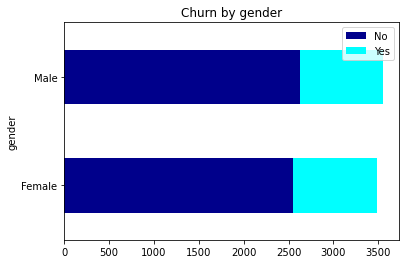

In [19]:
stacked_plot(df, 'gender', 'Churn')

`According to its gender, the number of male and female who terminated the Telco(Churn) is quite similar.`

2. by Partner

<Figure size 1152x720 with 0 Axes>

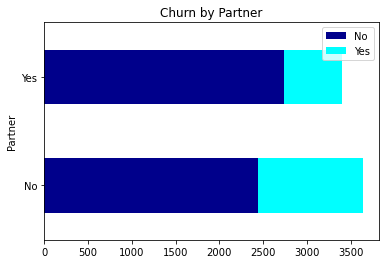

In [20]:
stacked_plot(df, 'Partner', 'Churn')

`according to the graph above, the customers with NO partner have higher probability to stop the Telco service(Churn) than the customers with Partners.`  

3. by Dependents

<Figure size 1152x720 with 0 Axes>

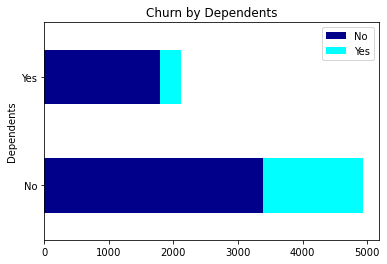

In [21]:
stacked_plot(df, 'Dependents', 'Churn')

`If we take a look at whether the customer has dependents or not, we can see that people who have Dependents are smaller in number than people who dont have dependents. Furthermore, the customers with No dependents have higher probability to churn.`

### 4. Churn by Telco Services

In [22]:
def countplot(df, variable1, variable2, hue = None , rotate=False):
    fig, ax = plt.subplots(ncols= 2, figsize=(20,6))
    sns.countplot(data=df , x=variable1, palette='magma' , hue= hue , ax=ax[0]).set_title(f'{variable1}')
    ax[0].tick_params(axis='x', rotation=45) if rotate == True else False
    sns.countplot(data=df , x=variable2, palette='magma' ,hue= hue , ax=ax[1]).set_title(f'{variable2}')
    ax[1].tick_params(axis='x', rotation=45) if rotate == True else False
    plt.show

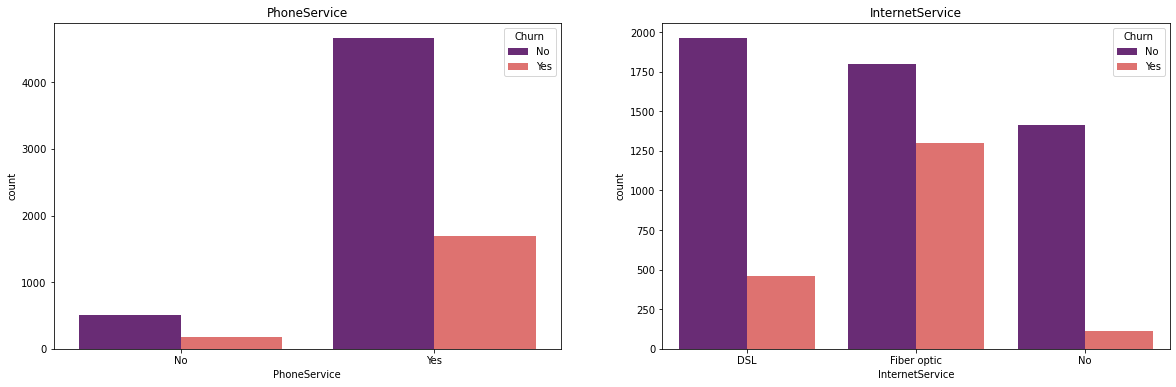

In [23]:
countplot(df, 'PhoneService', 'InternetService', hue='Churn')

- Customers who subscribed to Phone service is higher in number than customers who dont. This means that Phone service is one of the most popular service in Telco.
- From the InternetService, both DSL and FIber Optic are popular since the number of people who subscribed to these two service than peoplo who dont. However if take a look at which service has more people to Churn, it is Fiber Optic service. This might be a good insight so that the Telco company can address to this problem and solve it so that they can reduce customer from leaving.

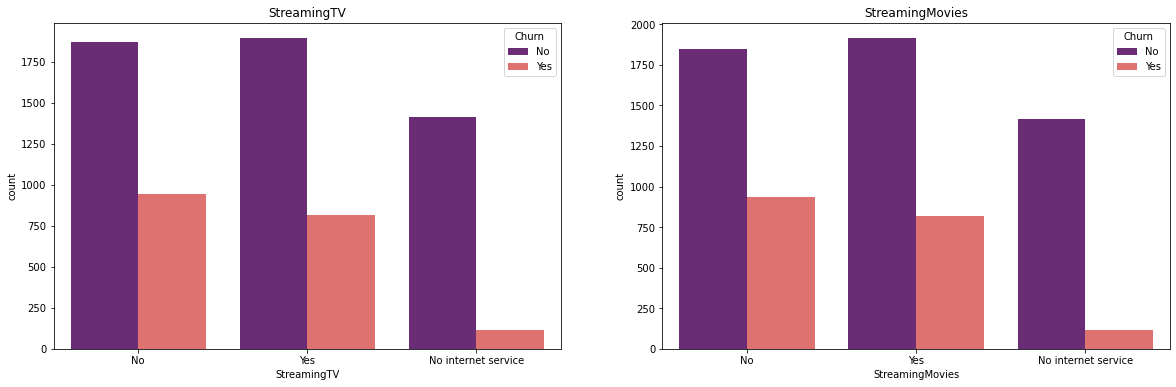

In [24]:
countplot(df, 'StreamingTV', 'StreamingMovies', hue='Churn')

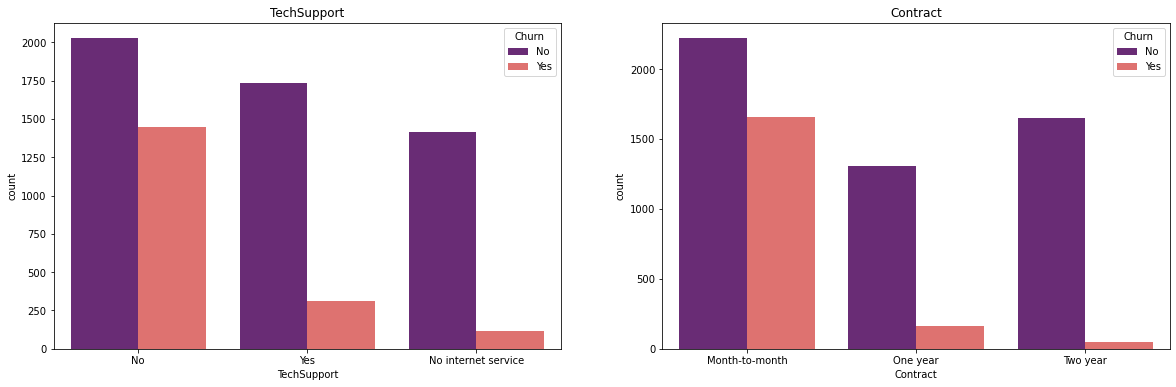

In [25]:
countplot(df, 'TechSupport', 'Contract', hue='Churn')

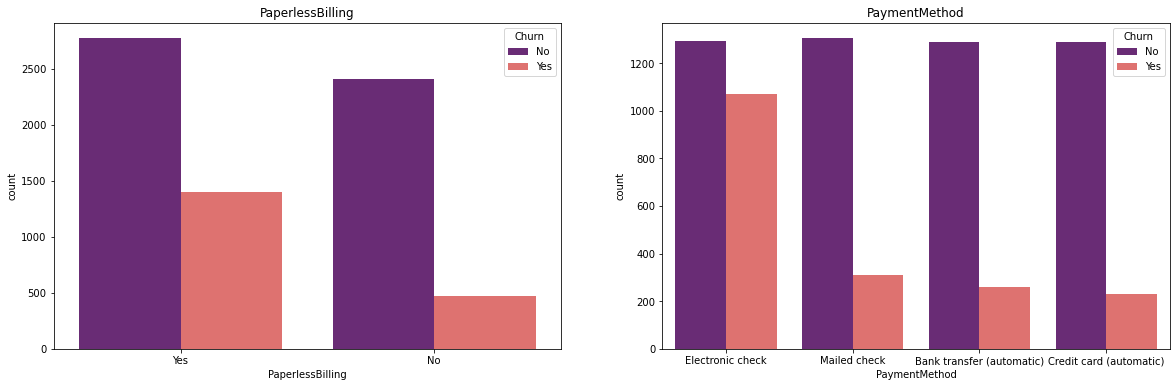

In [26]:
countplot(df, 'PaperlessBilling', 'PaymentMethod', hue='Churn')

---
## 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### 1. Data Inference

In [27]:
# Get Data for Model Inference

data_inf = df.sample(43, random_state=17)
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3616,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
2055,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
5394,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3697,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
2516,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


In [28]:
# Remove Inference-Set from Dataset

data_train_test = df.drop(data_inf.index)
data_train_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
1,Male,0,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
2,Female,0,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
4,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


### 2. Splitting Dataset

In [30]:
# Split between X (features) and y (target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
6996,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
6997,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
6998,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [31]:
# Split between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :', y_test.shape)

X_Train Size :  (5600, 19)
X_Test Size  :  (1400, 19)
y_train : (5600,)
y_test : (1400,)


In [32]:
# Split X_train, y_train into X_val and y_val for validation purpose

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=17)

print('X_Train Size : ', X_train.shape)
print('X_val Size  : ', X_val.shape)
print('y_train :' , y_train.shape)
print('y_val :', y_val.shape)

X_Train Size :  (5040, 19)
X_val Size  :  (560, 19)
y_train : (5040,)
y_val : (560,)


### 3. Handling Outlier

In [33]:
# Function to create histogram and cecking outlier.

def cek_outlier(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='grey', edgecolor='black')
    plt.title(f'{variable} Histogram')

    cek_skew0 = df[variable].skew()
    print (f'{variable} Skewness :', cek_skew0)

    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])

    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])

    if cek_skew0 < 0.5 and cek_skew0 > -0.5:
        # Boxplot normal distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys')
        plt.title('Boxplot normal dist.')
        plt.show()
        
        print(f'normal distribution - Jumlah {variable} outlier : ', len(total_normal))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper)/len(df[variable]) * 100) + (len(outlier_lower)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')
    else :
        # Boxplot skewed distribution
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[variable], whis=3, palette= 'Greys', showmeans=True)
        plt.title('Boxplot skewed dist.')
        plt.show()

        # Mean, median, modus
        mean = df[variable].mean()
        median = df[variable].median()
        mode = df[variable].mode()[0]

        if  mean > median and median > mode :
            print (f'Right skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        elif mean < median and median < mode :
            print (f'Left skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
        else:
            print(f'skewed distribution, Jumlah {variable} outlier : ', len(total_skew))
            
        # print(f'Jumlah {variable} outlier : ', len(total_skew))
        print('jumlah data : ' , len(df[variable]))
        print('% upper outliers : ' , np.round((len(outlier_upper_skew)/len(df[variable]) * 100),3))
        print('% lower outliers : ' , np.round((len(outlier_lower_skew)/len(df[variable]) * 100),3))
        print('% Total outliers : ', np.round(((len(outlier_upper_skew)/len(df[variable]) * 100) + (len(outlier_lower_skew)/len(df[variable]) * 100)),3))
        print('--------------------------------------------------------------------------------------------------------\n')

# Function to see precentage of every outlier  
def rank_normal(df, variable):
    #normal distirbution
    upper = df[variable].mean() + 3*df[variable].std()
    lower = df[variable].mean() - 3*df[variable].std()
    outlier_upper = df[df[variable] > upper]
    outlier_lower = df[df[variable] < lower]
    total_normal = pd.concat([outlier_upper, outlier_lower])
    pctg = (len(total_normal)/len(df[variable])* 100)
    print(f'{variable} : {len(total_normal)}  ({round(pctg,2)})%')

def rank_skew(df, variable):
    #skewed distribution
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_skew = df[variable].quantile(0.25) - (IQR * 3)
    upper_skew = df[variable].quantile(0.75) + (IQR * 3)
    outlier_upper_skew = df[df[variable] > upper_skew]
    outlier_lower_skew = df[df[variable] < lower_skew]
    total_skew = pd.concat([outlier_upper_skew + outlier_lower_skew])
    pctg = (len(total_skew)/len(df[variable])* 100)
    print(f'{variable} : {len(total_skew)}  ({round(pctg,2)})%')

- ##### X_train :

In [34]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(num_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


SeniorCitizen Skewness : 1.7893869816826768


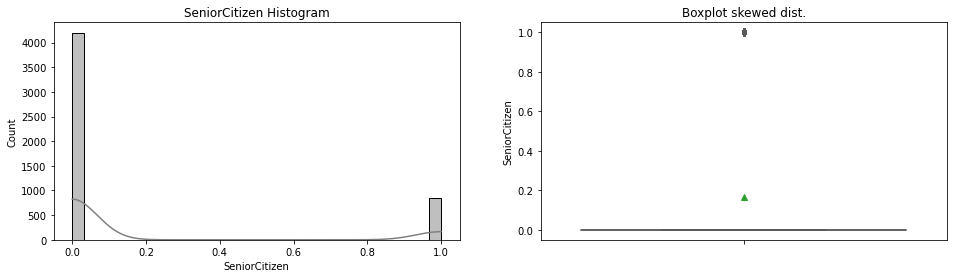

skewed distribution, Jumlah SeniorCitizen outlier :  840
jumlah data :  5040
% upper outliers :  16.667
% lower outliers :  0.0
% Total outliers :  16.667
--------------------------------------------------------------------------------------------------------

tenure Skewness : 0.2367521104344726


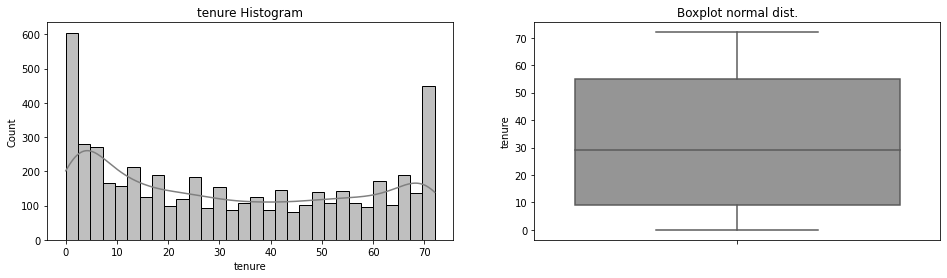

normal distribution - Jumlah tenure outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

MonthlyCharges Skewness : -0.2476867709918359


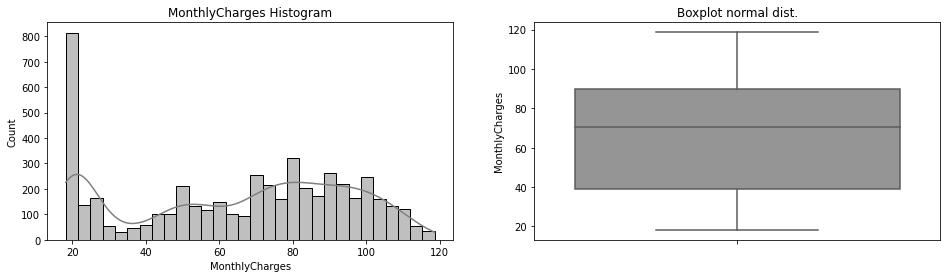

normal distribution - Jumlah MonthlyCharges outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------

TotalCharges Skewness : 0.9419388280144597


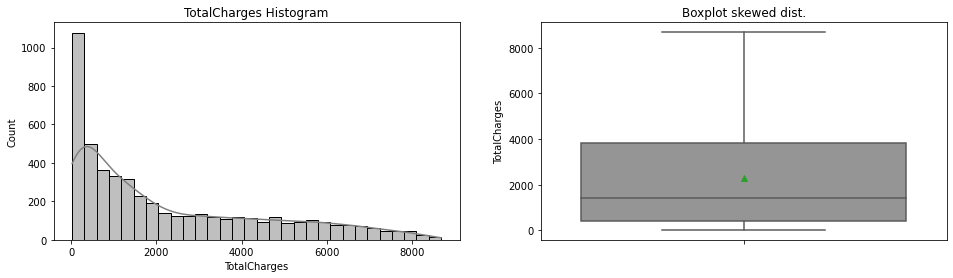

Right skewed distribution, Jumlah TotalCharges outlier :  0
jumlah data :  5040
% upper outliers :  0.0
% lower outliers :  0.0
% Total outliers :  0.0
--------------------------------------------------------------------------------------------------------



In [35]:
for i in num_col:
    cek_outlier(X_train, i)

In [36]:
# looping untuk membagi data normal distribution dan skewed distribution
normal = []
skew = []
for i in num_col:
    if X_train[i].skew() > - 0.5 and X_train[i].skew() < 0.5 :
        normal.append(i)
    else :
        skew.append(i)

print('Normal :\n----------------------')
for i in normal:
    rank_normal(X_train, i)
print('\nSkewed : \n--------------------------')
for i in skew:
    rank_skew(X_train, i)

Normal :
----------------------
tenure : 0  (0.0)%
MonthlyCharges : 0  (0.0)%

Skewed : 
--------------------------
SeniorCitizen : 840  (16.67)%
TotalCharges : 0  (0.0)%


`From the result above, we can see that the only outliers we have is from SeniorCitizen. However, if we take a closer look at its value, i think it is not an outlier that need to be handled. Its value is how it is collected from customers.`

- ##### y_train :

`No outliers.`


###  4. Handling Missing Values

#### TRAIN SET

* X_train :

In [37]:
# Checking missing values

missing = pd.DataFrame(X_train.isnull().sum(), columns = ['missing value'])
missing['%pctg'] = (missing/len(X_train)).round(3) * 100
missing[missing['missing value'] > 0].sort_values(by='%pctg')

,missing value,%pctg
TotalCharges,9,0.2


`a small number of missing values that we can handle by simply dropping the rows.`

In [38]:
# Drop missing values

X_train.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_train :

In [39]:
X_train.shape

(5031, 19)

In [40]:
y_train.shape

(5040,)

In [41]:
# make the dimensions of y_train similar to X_train

y_train = y_train.loc[X_train.index]

In [42]:
# check the rsult 

y_train.shape

(5031,)

#### TEST SET

* X_test :

In [43]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [44]:
# Drop missing values

X_test.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_test :

In [45]:
# make the dimensions of y_train similar to X_train

y_test = y_test.loc[X_test.index]

#### Validation SET

* X_val

In [46]:
X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [47]:
# Drop missing values

X_val.dropna(axis=0, subset=['TotalCharges'], inplace=True)

* y_val

In [48]:
# make the dimensions of y_train similar to X_train

y_val = y_val.loc[X_val.index]

Let's take a look at the data shape after handling outliers and missing values :

In [49]:
print('X_train :' ,X_train.shape)
print('X_test :' ,X_test.shape)
print('X_val :' ,X_val.shape)

X_train : (5031, 19)
X_test : (1399, 19)
X_val : (559, 19)


### 5. Feature Selection

##### 1. Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

# Encode
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [51]:
# check the encoding result
y_train

array([0, 1, 0, ..., 0, 0, 0])

---

In [52]:
y_train_ori = y_train.copy()
y_test_ori = y_test.copy()
y_val_ori = y_val.copy()

---

##### 2. Handling confusing value by mapping

There are several columns that have confusing value in it so we have to handle it by mapping/replacing its value manually. The aforementioned columns are :

        * MultipleLines (3): ['No phone service' 'No' 'Yes']

        * OnlineSecurity (3): ['No' 'Yes' 'No internet service']

        * OnlineBackup (3): ['Yes' 'No' 'No internet service']

        * DeviceProtection (3): ['No' 'Yes' 'No internet service']

        * TechSupport (3): ['No' 'Yes' 'No internet service']

        * StreamingTV (3): ['No' 'Yes' 'No internet service']

        * StreamingMovies (3): ['No' 'Yes' 'No internet service']

In this case i would like to use replace method to change Both 'No phone service' and 'No internet service' to No.

In [53]:
# Replace value 

X_train = X_train.replace('No phone service', 'No')
X_train = X_train.replace('No internet service', 'No')

X_test = X_test.replace('No phone service', 'No')
X_test = X_test.replace('No internet service', 'No')

X_val = X_val.replace('No phone service', 'No')
X_val = X_val.replace('No internet service', 'No')

In [54]:
# Checking the result

X_col = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print('Categorical Columns : ')
for i in X_col:
    cat = X_train[i].unique()
    print(f'{i} ({len(cat)}):',cat)
    print('----------------------------------------')


Categorical Columns : 
MultipleLines (2): ['No' 'Yes']
----------------------------------------
OnlineSecurity (2): ['No' 'Yes']
----------------------------------------
OnlineBackup (2): ['No' 'Yes']
----------------------------------------
DeviceProtection (2): ['No' 'Yes']
----------------------------------------
TechSupport (2): ['No' 'Yes']
----------------------------------------
StreamingTV (2): ['No' 'Yes']
----------------------------------------
StreamingMovies (2): ['No' 'Yes']
----------------------------------------


##### 3. Features coorelation to the target

---

`saya akan menggabungkan X_train dan y_train untuk melihat kolom-kolom X_train yang memiliki correlation yang baik dengan y_train.`

In [55]:
corr_purpose = pd.concat([X_train.reset_index(), pd.DataFrame(data= y_train, columns=['Target'])], axis=1)
corr_purpose

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
0,5415,Female,0,No,No,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.75,148.05,0
1,3454,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),106.15,4512.70,1
2,4218,Male,0,Yes,Yes,46,Yes,No,No,No,...,No,No,No,No,Two year,No,Credit card (automatic),19.75,856.50,0
3,5790,Female,0,No,No,22,Yes,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,20.05,470.20,0
4,3611,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,79.65,1928.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,154,Female,0,Yes,Yes,14,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),80.90,1152.80,0
5027,4456,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,541.15,1
5028,323,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.70,5138.10,0
5029,1630,Male,0,No,No,66,No,No,DSL,No,...,No,Yes,No,No,One year,No,Credit card (automatic),29.45,1983.15,0


* numerical columns to Target 

In [56]:
num = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Target']

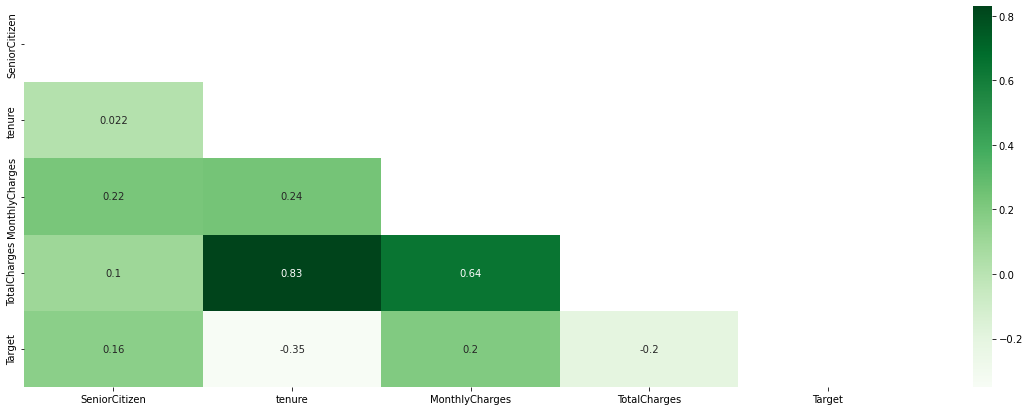

In [57]:
# plot the correlation heatmap
plt.figure(figsize=(20, 7))
mask=np.triu(np.ones_like(corr_purpose[num].corr()))
sns.heatmap(corr_purpose[num].corr(), annot=True, mask=mask ,cmap='Greens')
plt.show()

In [58]:
cat_col = corr_purpose[['gender','Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod', 'Target']]

In [59]:
# Feature Encoding using Label encoder
from sklearn.preprocessing import LabelEncoder
cat = cat_col.columns
lab_encoder = LabelEncoder()

# encoding the categorical column
for i in cat:
    cat_col[i] = lab_encoder.fit_transform(cat_col[i])

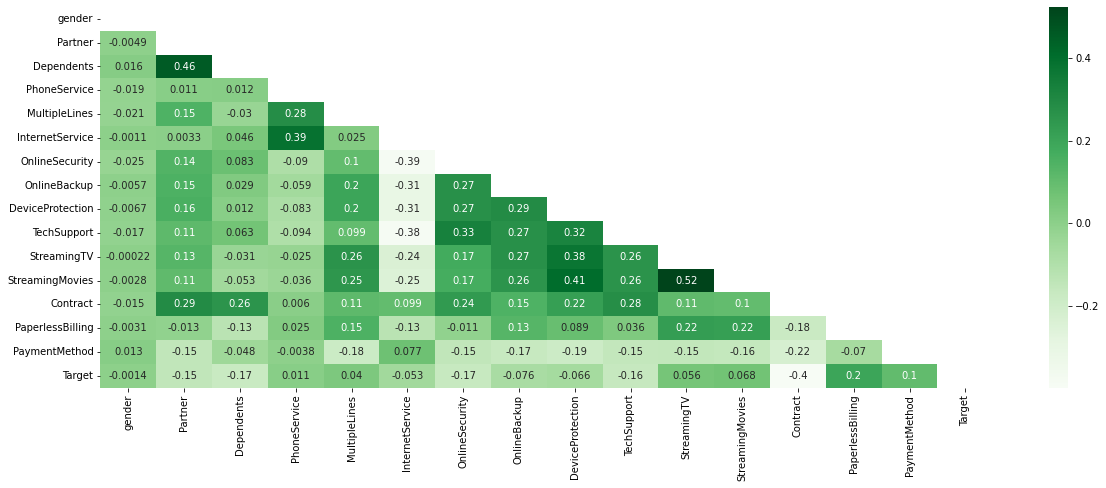

In [60]:
# plot the correlation heatmap
plt.figure(figsize=(20, 7))
mask=np.triu(np.ones_like(cat_col.corr()))
sns.heatmap(cat_col.corr(), annot=True, mask=mask ,cmap='Greens')
plt.show()

In [61]:
# Dropping columns with low correlation to the target

X_train = X_train.drop(['gender','PhoneService','MultipleLines', 'OnlineBackup','DeviceProtection','InternetService','StreamingTV','StreamingMovies'], axis=1)
X_test = X_test.drop(['gender','PhoneService','MultipleLines', 'OnlineBackup','DeviceProtection','InternetService','StreamingTV','StreamingMovies'], axis=1)
X_val = X_val.drop(['gender','PhoneService','MultipleLines', 'OnlineBackup','DeviceProtection','InternetService','StreamingTV','StreamingMovies'], axis=1)

---

### 6. Split between numerical and categorical columns


In [62]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('------------------------------------------------------------------------------------')
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------------------------------------------------------------
Categorical Columns :  ['Partner', 'Dependents', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [63]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

### 7. Feature Scaling

In [64]:
# Display X_train_num

X_train_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5415,0,3,44.75,148.05
3454,0,42,106.15,4512.70
4218,0,46,19.75,856.50
5790,0,22,20.05,470.20
3611,0,24,79.65,1928.70
...,...,...,...,...
154,0,14,80.90,1152.80
4456,0,7,74.90,541.15
323,0,52,102.70,5138.10
1630,0,66,29.45,1983.15


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)
X_val_num = scaler.transform(X_val_num)

In [66]:
X_train_num

array([[-0.44769352, -1.20129077, -0.68644312, -0.94816298],
       [-0.44769352,  0.39226252,  1.36887612,  0.98365238],
       [-0.44769352,  0.55570388, -1.52329949, -0.63459956],
       ...,
       [-0.44769352,  0.80086593,  1.25338994,  1.26045746],
       [-0.44769352,  1.3729107 , -1.19859922, -0.13593878],
       [-0.44769352,  1.61807274, -1.3793602 , -0.25721252]])

In [67]:
X_val_num

array([[ 2.23367091,  0.31054184,  0.880152  ,  0.61226263],
       [-0.44769352,  0.76000559,  0.60231569,  0.79631986],
       [-0.44769352, -0.87440804, -1.19357808, -0.86035018],
       ...,
       [ 2.23367091,  0.22882116, -1.50823608, -0.68797771],
       [-0.44769352,  1.29119001, -1.36764421, -0.30499171],
       [-0.44769352, -1.24215111, -1.53166805, -1.00149687]])

### 8. Feature Encoding

In [68]:
# Display X_train_cat

X_train_cat

,Partner,Dependents,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod
5415,No,No,No,No,Month-to-month,No,Mailed check
3454,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic)
4218,Yes,Yes,No,No,Two year,No,Credit card (automatic)
5790,No,No,No,No,Month-to-month,Yes,Mailed check
3611,Yes,No,No,No,Month-to-month,Yes,Mailed check
...,...,...,...,...,...,...,...
154,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic)
4456,No,No,No,No,Month-to-month,Yes,Electronic check
323,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
1630,No,No,No,Yes,One year,No,Credit card (automatic)


In [69]:
# Feature Encoding using One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder =  OneHotEncoder(sparse=False)
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_val_cat_enc = encoder.transform(X_val_cat)

In [70]:
X_train_cat_enc

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [71]:
# make columns name
test = encoder.get_feature_names_out(X_train_cat.columns.tolist())
column_cat = test.tolist()
column_cat

['Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

### 9. Concat between Numerical Columns and Categorical Columns

In [72]:
# Merge Numerical Features with Categorical Column

X_train_final = np.concatenate([X_train_num, X_train_cat_enc], axis=1)          # X_train final in array form
X_test_final = np.concatenate([X_test_num, X_test_cat_enc], axis=1)
X_val_final = np.concatenate([X_val_num, X_val_cat_enc], axis=1)
X_train_final

array([[-0.44769352, -1.20129077, -0.68644312, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44769352,  0.39226252,  1.36887612, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44769352,  0.55570388, -1.52329949, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.44769352,  0.80086593,  1.25338994, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44769352,  1.3729107 , -1.19859922, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44769352,  1.61807274, -1.3793602 , ...,  0.        ,
         0.        ,  0.        ]])

In [73]:
# Or we can turn it into dataframes

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + column_cat])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + column_cat])
X_val_final_df = pd.DataFrame(X_val_final, columns=[num_columns + column_cat])

In [74]:
X_train_final_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,OnlineSecurity_No,OnlineSecurity_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.447694,-1.201291,-0.686443,-0.948163,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.447694,0.392263,1.368876,0.983652,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.447694,0.555704,-1.523299,-0.634600,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.447694,-0.424944,-1.513257,-0.805578,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.447694,-0.343224,0.481808,-0.160039,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,-0.447694,-0.751827,0.523651,-0.503456,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5027,-0.447694,-1.037849,0.322806,-0.774175,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5028,-0.447694,0.800866,1.253390,1.260457,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5029,-0.447694,1.372911,-1.198599,-0.135939,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Let's take a look at the final dimensions of the data:

In [75]:
print('X_train_final :' ,X_train_final.shape)
print('X_test_final :' ,X_test_final.shape)
print('X_val_final :' ,X_val_final.shape)

X_train_final : (5031, 21)
X_test_final : (1399, 21)
X_val_final : (559, 21)


### 5. Handling Imbalance

From the Target label, we know that the proportions value between **YES** and **NO** is not balanced since the value count for No value is significantly higher than Yes value. If we see the percentage as shown below,

In [76]:
print('Percentage of each value in column Target :')
print('----------------------------------------------')
print('Yes[1] percentage :', round((df['Churn'].value_counts()[1])/(df['Churn'].value_counts()[0] + df['Churn'].value_counts()[1]) * 100,3), '%')
print('No[0] percentage :', round((df['Churn'].value_counts()[0])/(df['Churn'].value_counts()[0] + df['Churn'].value_counts()[1]) * 100,3), '%')

Percentage of each value in column Target :
----------------------------------------------
Yes[1] percentage : 26.537 %
No[0] percentage : 73.463 %


From the result above, considering the Yes value percentage from the dataset is at around 26.537 %, we can classify this case as 'MILD DEGREE of imbalanced'. Since this is not an extreme case of imbalanced, we can choose whether we want to handling it or nor. However, in this case i would like to try handling it by using over-sampling method SMOTENC in the next step below.

* SMOTENC

In [77]:
# SMOTE-NC

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], random_state = 42)
X_train_final_df, y_train = smotenc.fit_resample(X_train_final_df, y_train)


Let's see what is the result from using SMOTE NC:

In [78]:
count = (y_train == 0).sum()
print('SMOTENC Oversampling method')
print('-----------------------------')
print('Yes value :', (y_train == 1).sum())
print('No value :', (y_train == 0).sum())


SMOTENC Oversampling method
-----------------------------
Yes value : 3695
No value : 3695


We can see that the new dimension of each dataset is :

In [79]:
print('X_train_final_df :' , X_train_final_df.shape)
print('X_test_final_df :' , X_test_final_df.shape)
print('X_val_final_df :' , X_val_final_df.shape)

X_train_final_df : (7390, 21)
X_test_final_df : (1399, 21)
X_val_final_df : (559, 21)


`Now that the column target Churn is balanced by using oversampling SMOTENC method.`

---
## 6 - Model Definition : ANN

In [80]:
# Sequential API
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout

In Defining the model for Neural Network we have to determine the model architecture first. The architecture in this case can be define as the structure and the function of the neural network that consists of connections between one neuron to another. There three main components in neural network, which are :

* Input layer : We in put how many set of Features from the dataset.
* Hidden layer : an intermediate layers that do all the computational and extract the features from the dataset.
* Output layer : the extracted features by hidden layer then took by Output layer as an input then predict the final outcome based on model's learning with the help of activation function such as 'sigmoid' in this case.

source : 
- https://www.investopedia.com/terms/n/neuralnetwork.asp
- https://www.v7labs.com/blog/neural-network-architectures-guide

### 1. Base Model

There are two ways to build neural network architecture(in Keras).

- Sequential API

In [81]:
# Squential Base Model Architecture
model_sequential = Sequential()
model_sequential.add(Dense(100, activation='relu', input_shape=(21,))) # HIDDEN LAYER 1
model_sequential.add(Dense(50, activation='relu')) # HIDDEN LAYER 2
model_sequential.add(Dense(25, activation='relu')) # HIDDEN LAYER 3
model_sequential.add(Dense(5, activation='relu')) # HIDDEN LAYER 4
model_sequential.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

# Compile
model_sequential.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # Paling modern
              metrics=['accuracy'])

In [82]:
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 5)                 130       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 8,661
Trainable params: 8,661
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Train

hist_sequential = model_sequential.fit(X_train_final_df, y_train, epochs=25, validation_data=(X_val_final_df, y_val))

Epoch 1/25
231/231 [==============================] - 3s 6ms/step - loss: 0.4921 - accuracy: 0.7698 - val_loss: 0.5372 - val_accuracy: 0.7120
Epoch 2/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.7853 - val_loss: 0.4639 - val_accuracy: 0.7800
Epoch 3/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.7889 - val_loss: 0.4759 - val_accuracy: 0.7603
Epoch 4/25
231/231 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.7962 - val_loss: 0.4577 - val_accuracy: 0.7746
Epoch 5/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.7986 - val_loss: 0.4631 - val_accuracy: 0.7531
Epoch 6/25
231/231 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8015 - val_loss: 0.4825 - val_accuracy: 0.7513
Epoch 7/25
231/231 [==============================] - 1s 4ms/step - loss: 0.4186 - accuracy: 0.8069 - val_loss: 0.5245 - val_accuracy: 0.7370
Epoch 

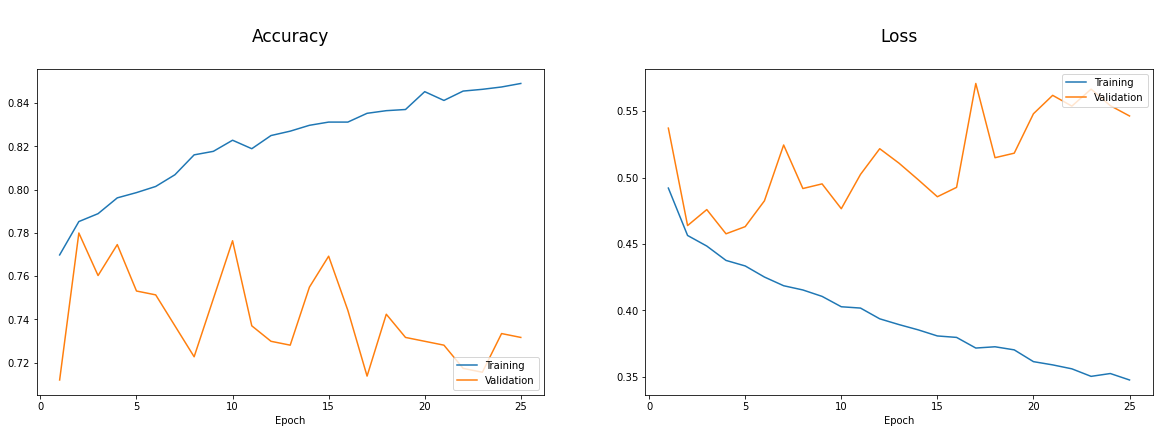

In [84]:
# Plot Sequential API result

fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(hist_sequential.history['accuracy'])

ax[0].plot(range(1,epochs+1),hist_sequential.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),hist_sequential.history['val_accuracy'], label='Validation')
ax[0].set_title('\nAccuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),hist_sequential.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),hist_sequential.history['val_loss'],label='Validation')
ax[1].set_title('\nLoss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

- Functional API

In [85]:
# Functional API Base Model Architecture
data_in = Input(shape = (21,))
hidden_1 = Dense(100, activation='relu')(data_in)
hidden_2 = Dense(50, activation='relu')(hidden_1)
hidden_3 = Dense(25, activation='relu')(hidden_2)
hidden_4 = Dense(5, activation='relu')(hidden_3)
out = Dense(1, activation = 'sigmoid')(hidden_4)

model_functional = Model(inputs=data_in, outputs=out)

# Compile
model_functional.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # Paling modern
              metrics=['accuracy'])

In [86]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_5 (Dense)             (None, 100)               2200      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 dense_8 (Dense)             (None, 5)                 130       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 8,661
Trainable params: 8,661
Non-trainable par

In [87]:
# Train

hist_functional = model_functional.fit(X_train_final_df, y_train, epochs=25, validation_data=(X_val_final_df, y_val))

Epoch 1/25
231/231 [==============================] - 2s 4ms/step - loss: 0.4869 - accuracy: 0.7689 - val_loss: 0.4423 - val_accuracy: 0.7782
Epoch 2/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7851 - val_loss: 0.5189 - val_accuracy: 0.7424
Epoch 3/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4433 - accuracy: 0.7939 - val_loss: 0.4686 - val_accuracy: 0.7424
Epoch 4/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7932 - val_loss: 0.4677 - val_accuracy: 0.7639
Epoch 5/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4286 - accuracy: 0.8001 - val_loss: 0.4894 - val_accuracy: 0.7639
Epoch 6/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4268 - accuracy: 0.7989 - val_loss: 0.4670 - val_accuracy: 0.7621
Epoch 7/25
231/231 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8095 - val_loss: 0.4815 - val_accuracy: 0.7692
Epoch 

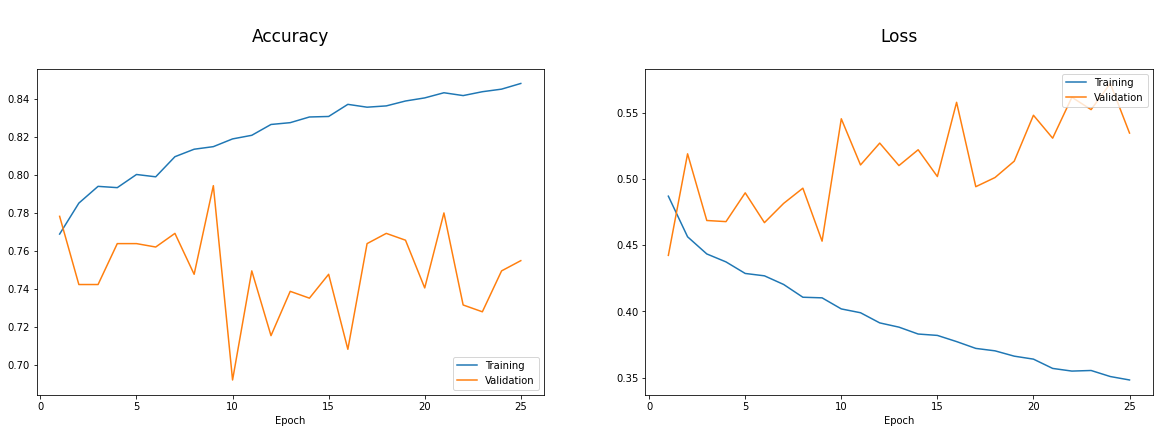

In [88]:
# Plot functional API result 

fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(hist_functional.history['accuracy'])

ax[0].plot(range(1,epochs+1),hist_functional.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),hist_functional.history['val_accuracy'], label='Validation')
ax[0].set_title('\nAccuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),hist_functional.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),hist_functional.history['val_loss'],label='Validation')
ax[1].set_title('\nLoss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

### 2. Optimazed Model

From the Base Model using Sequential API and Functional API we can see that both methods show similar result. So, actually we can choose one of the two. Since in this case our base model result is overfitting, we can handle this problem by using :

* Batch Normalization
* Weight Regularization

In this case, to handling overfitting, i choose one of the weight regularization methods which is called Dropout. The reason for this is because it is easy to use.

In [89]:
# Sequential API with optimization with Dropout method

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(21,))) # HIDDEN LAYER 1
model.add(Dropout(0.50))
model.add(Dense(50, activation='relu')) # HIDDEN LAYER 3
model.add(Dropout(0.50))
model.add(Dense(25, activation='relu')) # HIDDEN LAYER 4
model.add(Dropout(0.50))
model.add(Dense(5, activation='relu')) # HIDDEN LAYER 5
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

In [90]:
# Compile
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # Paling modern
              metrics=['accuracy'])


## 7 - Model Training : ANN

In [91]:
# Train

history = model.fit(X_train_final_df, y_train, epochs=25, validation_data=(X_val_final_df, y_val))

Epoch 1/25
231/231 [==============================] - 2s 4ms/step - loss: 0.6779 - accuracy: 0.5660 - val_loss: 0.6013 - val_accuracy: 0.7728
Epoch 2/25
231/231 [==============================] - 1s 3ms/step - loss: 0.5983 - accuracy: 0.6654 - val_loss: 0.4929 - val_accuracy: 0.7209
Epoch 3/25
231/231 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.7060 - val_loss: 0.4947 - val_accuracy: 0.7245
Epoch 4/25
231/231 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.7162 - val_loss: 0.4968 - val_accuracy: 0.7227
Epoch 5/25
231/231 [==============================] - 1s 4ms/step - loss: 0.5574 - accuracy: 0.7237 - val_loss: 0.4702 - val_accuracy: 0.7549
Epoch 6/25
231/231 [==============================] - 1s 3ms/step - loss: 0.5478 - accuracy: 0.7311 - val_loss: 0.4753 - val_accuracy: 0.7549
Epoch 7/25
231/231 [==============================] - 1s 5ms/step - loss: 0.5490 - accuracy: 0.7294 - val_loss: 0.4505 - val_accuracy: 0.7674
Epoch 

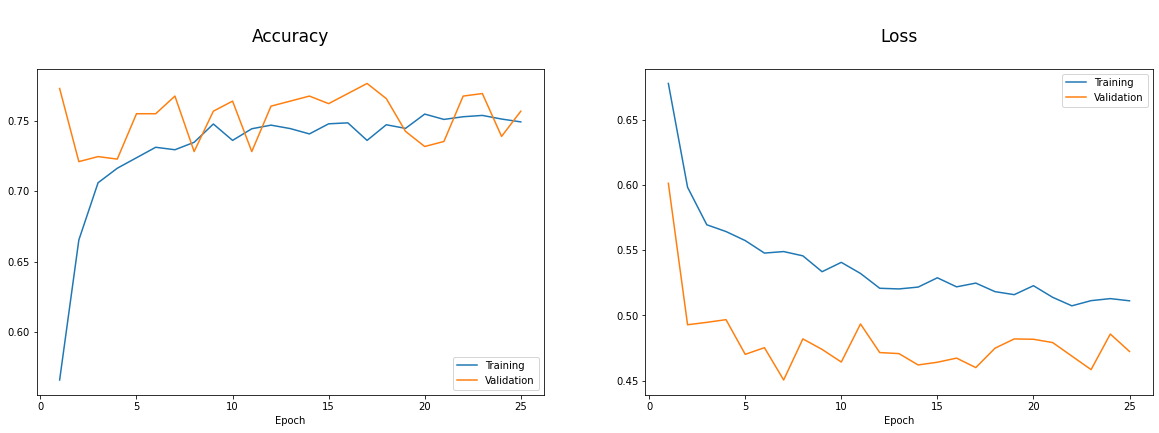

In [92]:
fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(history.history['accuracy'])
ax[0].plot(range(1,epochs+1),history.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),history.history['val_accuracy'], label='Validation')
ax[0].set_title('\nAccuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),history.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
ax[1].set_title('\nLoss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

Now, after using Dropout, the model can be considered as good fit since the accuracy score between Training set and validation set show similar performance.

## 8 - Model Evaluation : ANN

Now, we can test the performance of the optimized model using Test set we prepared before hand. 

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score

y_pred=model.predict(X_test_final_df)
y_pred = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred))

44/44 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1028
           1       0.52      0.72      0.60       371

    accuracy                           0.75      1399
   macro avg       0.70      0.74      0.71      1399
weighted avg       0.79      0.75      0.76      1399



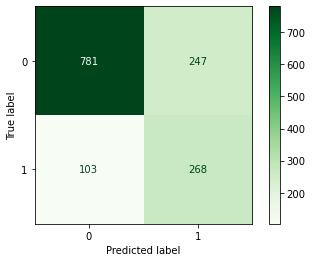

In [94]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Greens')
plt.show()


In [105]:
print ('----------------Precision---------------------')
print ('How often the model correcct in predicting Customer Churn [1] : ', round(conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1]),2))
print ('How often the model correcct in predicting Customer Retain [0] : ', round(conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[1,0]),2))
print ('\n----------------Recall---------------------')
print (" When it's actually Churn , how often does it predict Churn [1] : ", round(conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0]),2))
print (" When it's actually Retain , how often does it predict Retain [0] : ", round(conf_matrix[0,0]/(conf_matrix[0,0] + conf_matrix[0,1]),2))
print ('\n----------------Accuracy---------------------')
print ('Overall, how often is the classifier correct ? ', round((conf_matrix[0,0]+conf_matrix[1,1])/(1028+371),2))
print ('\n----------------Error---------------------')
print ('Overall, how often is it wrong? ', round((conf_matrix[1,0]+conf_matrix[0,1])/(1028+371),2))

----------------Precision---------------------
How often the model correcct in predicting Customer Churn [1] :  0.52
How often the model correcct in predicting Customer Retain [0] :  0.88

----------------Recall---------------------
 When it's actually Churn , how often does it predict Churn [1] :  0.72
 When it's actually Retain , how often does it predict Retain [0] :  0.76

----------------Accuracy---------------------
Overall, how often is the classifier correct ?  0.75

----------------Error---------------------
Overall, how often is it wrong?  0.25


From the both classification report and confusion matrix, we can see that :

* the model actually performed well at an accuracy of 75% 
* the model error at 25%

However, since the test set is imbalanced (from support: 1028 [0] occurence vs 371 [1] occurence), then we should view the model performance based on its recall score.

* When it's actually Churn, model accuracy is 72%
* when it's actually Retain, model accuracy is 76%

From recall score, the model performed well since the recall score is both close to 100 %.

`the result can change sometimes due to the notebook being restart`

Source : https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

---

## 9 - Model Saving

In [106]:
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# from imblearn.pipeline import Pipeline, make_pipeline

### 1. Make the pipeline

In [107]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

prep_pipeline = make_pipeline(data_pipeline)

In [108]:
prep_pipeline.fit(X_train,y_train_ori)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner', 'Dependents',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

- Using pipeline for Preprocessing

Feature scalling and encoding

In [110]:
X_train.shape

(5031, 11)

In [111]:
y_train_ori.shape

(5031,)

In [112]:
X_train_after_prep = prep_pipeline.transform(X_train)
X_test_after_prep = prep_pipeline.transform(X_test)
X_val_after_prep = prep_pipeline.transform(X_val)

Handling imbalance

In [113]:
smotenc = SMOTENC([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], random_state = 42)
X_train_after_prep, y_train_ori = smotenc.fit_resample(X_train_after_prep, y_train_ori)

In [114]:
print('SMOTENC Oversampling method')
print('-----------------------------')
print('Yes value :', (y_train_ori == 1).sum())
print('No value :', (y_train_ori == 0).sum())


SMOTENC Oversampling method
-----------------------------
Yes value : 3695
No value : 3695


Final dataset after preprocessing

In [115]:
X_train_prep_final = pd.DataFrame(X_train_after_prep)
X_test_prep_final = pd.DataFrame(X_test_after_prep)
X_val_prep_final = pd.DataFrame(X_val_after_prep)

In [116]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_after_prep, y_train_ori)).shuffle(buffer_size=X_train.shape[0]).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_after_prep, y_val_ori)).shuffle(buffer_size=X_val.shape[0]).batch(32)

In [117]:
# Buat arsiteknya

my_model = Sequential()
my_model.add(Dense(100, activation='relu', input_shape=(21,))) # HIDDEN LAYER 1
my_model.add(Dropout(0.50))
my_model.add(Dense(50, activation='relu')) # HIDDEN LAYER 3
my_model.add(Dropout(0.50))
my_model.add(Dense(25, activation='relu')) # HIDDEN LAYER 4
my_model.add(Dropout(0.50))
my_model.add(Dense(5, activation='relu')) # HIDDEN LAYER 5
my_model.add(Dropout(0.50))
my_model.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

In [118]:
# Compile
my_model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # Paling modern
              metrics=['accuracy'])

In [119]:
# Train

history_test = my_model.fit(train_dataset, epochs=20, validation_data=(val_dataset))

Epoch 1/20
231/231 [==============================] - 2s 4ms/step - loss: 0.6834 - accuracy: 0.5679 - val_loss: 0.6032 - val_accuracy: 0.7048
Epoch 2/20
231/231 [==============================] - 1s 4ms/step - loss: 0.6205 - accuracy: 0.6671 - val_loss: 0.5275 - val_accuracy: 0.6440
Epoch 3/20
231/231 [==============================] - 1s 4ms/step - loss: 0.5775 - accuracy: 0.6970 - val_loss: 0.5020 - val_accuracy: 0.6673
Epoch 4/20
231/231 [==============================] - 1s 4ms/step - loss: 0.5692 - accuracy: 0.7127 - val_loss: 0.4977 - val_accuracy: 0.6762
Epoch 5/20
231/231 [==============================] - 1s 4ms/step - loss: 0.5578 - accuracy: 0.7177 - val_loss: 0.5272 - val_accuracy: 0.6530
Epoch 6/20
231/231 [==============================] - 1s 4ms/step - loss: 0.5594 - accuracy: 0.7284 - val_loss: 0.5038 - val_accuracy: 0.6816
Epoch 7/20
231/231 [==============================] - 1s 3ms/step - loss: 0.5475 - accuracy: 0.7286 - val_loss: 0.4929 - val_accuracy: 0.7013
Epoch 

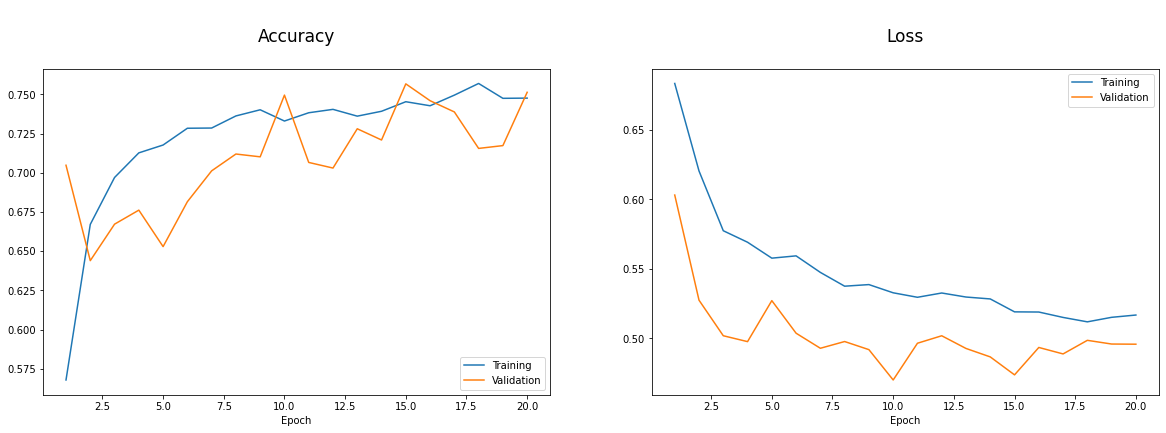

In [120]:
fig,ax=plt.subplots(ncols=2,figsize=(20,6))
epochs=len(history_test.history['accuracy'])
ax[0].plot(range(1,epochs+1),history_test.history['accuracy'], label='Training')
ax[0].plot(range(1,epochs+1),history_test.history['val_accuracy'], label='Validation')
ax[0].set_title('\nAccuracy\n', fontsize=17)
ax[0].set_xlabel('Epoch')
ax[0].legend(loc = 'lower right')

ax[1].plot(range(1,epochs+1),history_test.history['loss'],label='Training')
ax[1].plot(range(1,epochs+1),history_test.history['val_loss'],label='Validation')
ax[1].set_title('\nLoss\n', fontsize=17)
ax[1].set_xlabel('Epoch')
ax[1].legend(loc = 'upper right')
plt.show()

In [121]:
from sklearn.metrics import classification_report

y_pred_pipe=my_model.predict(X_test_after_prep)
y_pred_pipe = np.where(y_pred >= 0.5, 1, 0)

print(classification_report(y_test,y_pred_pipe))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1028
           1       0.52      0.72      0.60       371

    accuracy                           0.75      1399
   macro avg       0.70      0.74      0.71      1399
weighted avg       0.79      0.75      0.76      1399



In [122]:
import pickle

In [123]:
# simpan  pipeline

with open("E:/ftds/learning_journal/phase_2/week 1/preprocessing.pkl", "wb") as f:
  pickle.dump(prep_pipeline, f)

In [124]:
my_model.save('my_model.h5')

In [125]:
X_test.to_csv('m1_churn_test.csv',index=None)

---
## 10 - Model Inference

1. Load the data

In [139]:
# Load the data

data_inf.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Yes,No,69,Yes,No,One year,No,Credit card (automatic),87.30,6055.55,No
1,0,No,No,45,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
2,0,Yes,No,48,No,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3,0,Yes,Yes,32,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
4,1,No,No,16,No,No,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


In [132]:
data_inf = data_inf.replace('No phone service', 'No')
data_inf = data_inf.replace('No internet service', 'No')

In [129]:
data_inf = data_inf.drop(['gender','PhoneService','MultipleLines', 'OnlineBackup','DeviceProtection','InternetService','StreamingTV','StreamingMovies'], axis=1)

In [133]:
data_inf.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Yes,No,69,Yes,No,One year,No,Credit card (automatic),87.30,6055.55,No
1,0,No,No,45,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,No
2,0,Yes,No,48,No,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,No
3,0,Yes,Yes,32,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No
4,1,No,No,16,No,No,Month-to-month,Yes,Electronic check,96.40,1581.20,Yes


2. Predict the data using the pipeline 

In [140]:
data_inf_new = data_inf.iloc[:,:-1]

In [141]:
data_inf_pred = prep_pipeline.transform(data_inf_new)

In [142]:
data_inf_pred

array([[ 2.23367091,  1.49549172,  0.73788642,  1.6665253 ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.44769352,  0.51484354,  1.44586691,  1.18370978,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.44769352,  0.63742456,  1.33372815,  1.23631337,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.44769352, -0.01634089,  0.8148772 ,  0.27066019

In [143]:
data_inf_pred = my_model.predict(data_inf_pred)


2/2 [==============================] - 0s 4ms/step


In [145]:
data_inf_pred = np.where(data_inf_pred >= 0.5, 1, 0)
data_inf_pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

The model can predict well using data Inference.

## 10 - Pengambilan Kesimpulan

Kesimpulan dari Project ini adalah :

1. Dari dataset awal memiliki ukuran 7043 baris dan 21 kolom selanjutnya dibagi menjadi :

                            1. X_train, y_train
                            2. X_test, y_test
                            3. x_val, y_val
                            4. Data inference

2. Dari hasil loading data info dapat dilihat bahwa dapat diketahui dataset memiliki 11 missing value.

3. Dari hasil Preprocessing, diketahui bahwa outlier yang terdapat dapat dihiraukan karena merupakan outliers yang natural. Untuk missing value bisa di-drop karena jumlahnya yang sangat sedikit sehingga tidak akan mempengaruhi model training.

6. Model dibuat dan ditraining dengan metode ANN sequential API dan Functional API. Metode optimalization yang digunakan adalah  metode Dropout untuk menghandle model baseline yang overfit. Hasil yang diperoleh cukup baik yaitu model memilki accuracy sekitar 75%.

7. Selanjutnya, Model di uji dengan data inference dan berhasil memprediksi dengan baik.





---